# 12d - PuertoRico AgriPV Site

Overview: NREL will be leading a study in Puerto Rico that will examine coffee production underneath elevated solar panels. Construction will proceed later in 2021, and the team is in the process of designing the solar panel configuration to appropriately represent ideal shading conditions for coffee. The coffee trees would be under and/or in between elevated solar panels (panels would be elevated 6, 8, or 10 ft tall). The light/shade analysis will help determine appropriate panel heights and spacings. We envision analyzing a few different configurations that could achieve appropriate shading.  The desired level of shading is maximum of 30% (i.e., they want 70% of normal, unshaded light). 

Details:
1.  The coffee plants are expected to be ~5 ft tall. 
2.	Location: 18.202142, -66.759187; (18°12'07.7"N 66°45'33.1"W)
3.	Desired area of initial analysis: 400-600 ft2 (37-55 m2)
4.	Racking: Fixed-tilt panels
5.	Panel size: 3.3 feet x 5.4 feet                                    (1m x 1.64m)
6.	Analysis variations
<ul> <li> a.	Panel height: would like to examine heights of 6 ft, 8 ft, and 10 ft hub height. 
<li> b.	Panel spacing (N/W): would like to look at multiple distances (e.g., 2 ft, 3 ft, 4 ft) </li> 
<li> c.	Inter-Row spacing (E/W): would like to look at multiple distances (e.g., 2 ft, 3 ft, 4 ft)! </li> 


Coffee tree: 5-6 ft tall x 3ft wide  (ref: https://realgoodcoffeeco.com/blogs/realgoodblog/how-to-grow-a-coffee-plant-at-home#:~:text=However%2C%20you%20must%20keep%20in,tall%20and%203%20feet%20wide.)

In [14]:
import bifacial_radiance
import os
from pathlib import Path
import numpy as np
import pandas as pd

In [15]:
lat = 18.202142
lon = -66.759187

albedo = 0.25 # Grass value from Torres Molina, "Measuring UHI in Puerto Rico" 18th LACCEI 
              # International Multi-Conference for Engineering, Education, and Technology

ft2m = 0.3048

# Loops
clearance_heights = np.array([6.0, 8.0, 10.0])* ft2m
xgaps = np.array([2, 3, 4]) * ft2m
Ds = np.array([2, 3, 4]) * ft2m    # D is a variable that represents the spacing between rows, not-considering the collector areas.
tilts = [round(lat), 10]

x = 1.64
y = 1        
azimuth = 180
nMods = 20
nRows = 7
numpanels = 1
moduletype = 'PR'
hpc = False
sim_general_name = 'Coffee'

In [16]:
testfolder = str(Path().resolve().parent.parent / 'bifacial_radiance' / 'TEMP' / 'PuertoRico')
if not os.path.exists(testfolder):
    os.makedirs(testfolder)
print(testfolder)

C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\bifacial_radiance\TEMP\PuertoRico


In [17]:
if not os.path.exists(os.path.join(testfolder, 'EPWs')):
    demo = bifacial_radiance.RadianceObj('test',testfolder)  
    epwfile = demo.getEPW(lat,lon)    
else:
    epwfile = r'EPWs\PRI_Mercedita.AP.785203_TMY3.epw'

path = C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\bifacial_radiance\TEMP\PuertoRico
Making path: images
Making path: objects
Making path: results
Making path: skies
Making path: EPWs
Making path: materials
Getting weather file: PRI_Mercedita.AP.785203_TMY3.epw
 ... OK!


# Loop to sample irradiance at where Three would be located

In [52]:
demo = bifacial_radiance.RadianceObj(sim_name,str(testfolder))  
demo.setGround(albedo)
demo.readWeatherFile(epwfile)
demo.genCumSky()

for ch in range (0, len(clearance_heights)):
    
    clearance_height = clearance_heights[ch]
    for xx in range (0, len(xgaps)):
        
        xgap = xgaps[xx]

        for tt in range (0, len(tilts)):
        
            tilt = tilts[tt]
            for dd in range (0, len(Ds)):
                pitch = y * np.cos(np.radians(tilt))+Ds[dd]

                sim_name = (sim_general_name+'_ch_'+str(round(clearance_height,1))+
                                '_xgap_'+str(round(xgap,1))+\
                                '_tilt_'+str(round(tilt,1))+
                                '_pitch_'+str(round(pitch,1)))

                coffeeplant_x = (x+xgap)/2
                coffeeplant_y = pitch/2

                demo.makeModule(name=moduletype, x=x, y=y, xgap = xgap)
                sceneDict = {'tilt':tilt,'pitch':pitch,'clearance_height':clearance_height,'azimuth':azimuth, 'nMods': nMods, 'nRows': nRows} 
                scene = demo.makeScene(moduletype=moduletype,sceneDict=sceneDict, hpc=hpc, radname = sim_name)
                octfile = demo.makeOct(octname = demo.basename , hpc=hpc)  
                analysis = bifacial_radiance.AnalysisObj(octfile=octfile, name=sim_name)

                frontscan, backscan = analysis.moduleAnalysis(scene=scene, sensorsy=1)
                groundscan = frontscan.copy() 
                groundscan['xstart'] = coffeeplant_x
                groundscan['ystart'] = coffeeplant_y
                groundscan['zstart'] = 0.05
                groundscan['orient'] = '0 0 -1'
                analysis.analysis(octfile, name=sim_name+'_Front&Back', frontscan=frontscan, backscan=backscan)
                analysis.analysis(octfile, name=sim_name+'_Ground&Back', frontscan=groundscan, backscan=backscan)

                

path = C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\PuertoRico
Loading albedo, 1 value(s), 0.250 avg
1 nonzero albedo values.
start: 1991-01-01 01:00:00
end: 1994-12-31 23:00:00
Saving file EPWs\epw_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos
message: Error!  Solar altitude is -13 < -6 degrees and Idh = 11 > 10 W/m^2 on day 52 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -13 < -6 degrees and Idh = 16 > 10 W/m^2 on day 58 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -13 < -6 degrees and Idh = 14 > 10 W/m^2 on day 59 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -13 < -6 degrees and Idh = 11 > 10 W/m^2 on day 59 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -13 < -6 degrees and Idh = 14 > 10 W/m^2 on day 61 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -13 < -6 degrees and Idh = 16 > 10 W/

Created Coffee_ch_1.8_xgap_0.6_tilt_10_pitch_2.2.oct
Linescan in process: Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.6_Front&Back_Front
Linescan in process: Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.6_Front&Back_Back
Saved: results\irr_Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.6_Front&Back.csv
Linescan in process: Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.6_Ground&Back_Front
Linescan in process: Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.6_Ground&Back_Back
Saved: results\irr_Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.6_Ground&Back.csv

Module Name: PR
Pre-existing .rad file objects\PR.rad will be overwritten
Module PR updated in module.json
Created Coffee_ch_1.8_xgap_0.6_tilt_10_pitch_2.2.oct
Linescan in process: Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.9_Front&Back_Front
Linescan in process: Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.9_Front&Back_Back
Saved: results\irr_Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.9_Front&Back.csv
Linescan in process: Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.9_Ground&Back_Front
Linesca

Linescan in process: Coffee_ch_1.8_xgap_1.2_tilt_18_pitch_1.9_Front&Back_Back
Saved: results\irr_Coffee_ch_1.8_xgap_1.2_tilt_18_pitch_1.9_Front&Back.csv
Linescan in process: Coffee_ch_1.8_xgap_1.2_tilt_18_pitch_1.9_Ground&Back_Front
Linescan in process: Coffee_ch_1.8_xgap_1.2_tilt_18_pitch_1.9_Ground&Back_Back
Saved: results\irr_Coffee_ch_1.8_xgap_1.2_tilt_18_pitch_1.9_Ground&Back.csv

Module Name: PR
Pre-existing .rad file objects\PR.rad will be overwritten
Module PR updated in module.json
Created Coffee_ch_1.8_xgap_0.6_tilt_10_pitch_2.2.oct
Linescan in process: Coffee_ch_1.8_xgap_1.2_tilt_18_pitch_2.2_Front&Back_Front
Linescan in process: Coffee_ch_1.8_xgap_1.2_tilt_18_pitch_2.2_Front&Back_Back
Saved: results\irr_Coffee_ch_1.8_xgap_1.2_tilt_18_pitch_2.2_Front&Back.csv
Linescan in process: Coffee_ch_1.8_xgap_1.2_tilt_18_pitch_2.2_Ground&Back_Front
Linescan in process: Coffee_ch_1.8_xgap_1.2_tilt_18_pitch_2.2_Ground&Back_Back
Saved: results\irr_Coffee_ch_1.8_xgap_1.2_tilt_18_pitch_2.2_

Saved: results\irr_Coffee_ch_2.4_xgap_0.9_tilt_18_pitch_2.2_Front&Back.csv
Linescan in process: Coffee_ch_2.4_xgap_0.9_tilt_18_pitch_2.2_Ground&Back_Front
Linescan in process: Coffee_ch_2.4_xgap_0.9_tilt_18_pitch_2.2_Ground&Back_Back
Saved: results\irr_Coffee_ch_2.4_xgap_0.9_tilt_18_pitch_2.2_Ground&Back.csv

Module Name: PR
Pre-existing .rad file objects\PR.rad will be overwritten
Module PR updated in module.json
Created Coffee_ch_1.8_xgap_0.6_tilt_10_pitch_2.2.oct
Linescan in process: Coffee_ch_2.4_xgap_0.9_tilt_10_pitch_1.6_Front&Back_Front
Linescan in process: Coffee_ch_2.4_xgap_0.9_tilt_10_pitch_1.6_Front&Back_Back
Saved: results\irr_Coffee_ch_2.4_xgap_0.9_tilt_10_pitch_1.6_Front&Back.csv
Linescan in process: Coffee_ch_2.4_xgap_0.9_tilt_10_pitch_1.6_Ground&Back_Front
Linescan in process: Coffee_ch_2.4_xgap_0.9_tilt_10_pitch_1.6_Ground&Back_Back
Saved: results\irr_Coffee_ch_2.4_xgap_0.9_tilt_10_pitch_1.6_Ground&Back.csv

Module Name: PR
Pre-existing .rad file objects\PR.rad will be

Linescan in process: Coffee_ch_3.0_xgap_0.6_tilt_10_pitch_1.6_Ground&Back_Back
Saved: results\irr_Coffee_ch_3.0_xgap_0.6_tilt_10_pitch_1.6_Ground&Back.csv

Module Name: PR
Pre-existing .rad file objects\PR.rad will be overwritten
Module PR updated in module.json
Created Coffee_ch_1.8_xgap_0.6_tilt_10_pitch_2.2.oct
Linescan in process: Coffee_ch_3.0_xgap_0.6_tilt_10_pitch_1.9_Front&Back_Front
Linescan in process: Coffee_ch_3.0_xgap_0.6_tilt_10_pitch_1.9_Front&Back_Back
Saved: results\irr_Coffee_ch_3.0_xgap_0.6_tilt_10_pitch_1.9_Front&Back.csv
Linescan in process: Coffee_ch_3.0_xgap_0.6_tilt_10_pitch_1.9_Ground&Back_Front
Linescan in process: Coffee_ch_3.0_xgap_0.6_tilt_10_pitch_1.9_Ground&Back_Back
Saved: results\irr_Coffee_ch_3.0_xgap_0.6_tilt_10_pitch_1.9_Ground&Back.csv

Module Name: PR
Pre-existing .rad file objects\PR.rad will be overwritten
Module PR updated in module.json
Created Coffee_ch_1.8_xgap_0.6_tilt_10_pitch_2.2.oct
Linescan in process: Coffee_ch_3.0_xgap_0.6_tilt_10_pitc

Saved: results\irr_Coffee_ch_3.0_xgap_1.2_tilt_10_pitch_1.9_Ground&Back.csv

Module Name: PR
Pre-existing .rad file objects\PR.rad will be overwritten
Module PR updated in module.json
Created Coffee_ch_1.8_xgap_0.6_tilt_10_pitch_2.2.oct
Linescan in process: Coffee_ch_3.0_xgap_1.2_tilt_10_pitch_2.2_Front&Back_Front
Linescan in process: Coffee_ch_3.0_xgap_1.2_tilt_10_pitch_2.2_Front&Back_Back
Saved: results\irr_Coffee_ch_3.0_xgap_1.2_tilt_10_pitch_2.2_Front&Back.csv
Linescan in process: Coffee_ch_3.0_xgap_1.2_tilt_10_pitch_2.2_Ground&Back_Front
Linescan in process: Coffee_ch_3.0_xgap_1.2_tilt_10_pitch_2.2_Ground&Back_Back
Saved: results\irr_Coffee_ch_3.0_xgap_1.2_tilt_10_pitch_2.2_Ground&Back.csv


# EMPTY FIELD

In [55]:
sim_name = 'EMPTY'
demo.makeModule(name=moduletype, x=0.001, y=0.001, xgap = xgap)
sceneDict = {'tilt':0,'pitch':2,'clearance_height':0.005,'azimuth':180, 'nMods': 1, 'nRows': 1} 
scene = demo.makeScene(moduletype=moduletype,sceneDict=sceneDict, hpc=hpc, radname = sim_name)
octfile = demo.makeOct(octname = demo.basename , hpc=hpc)  
analysis = bifacial_radiance.AnalysisObj(octfile=octfile, name=sim_name)
frontscan, backscan = analysis.moduleAnalysis(scene=scene, sensorsy=1)
emptyscan = frontscan.copy() 
emptyscan['xstart'] = 3
emptyscan['ystart'] = 3
emptyscan['zstart'] = 0.05
emptyscan['orient'] = '0 0 -1'
emptybackscan = emptyscan.copy()
emptybackscan['orient'] = '0 0 1'
analysis.analysis(octfile, name='_EMPTYSCAN', frontscan=emptyscan, backscan=emptybackscan)



Module Name: PR
Pre-existing .rad file objects\PR.rad will be overwritten
Module PR updated in module.json
Created Coffee_ch_1.8_xgap_0.6_tilt_10_pitch_2.2.oct
Linescan in process: _EMPTYSCAN_Front
Linescan in process: _EMPTYSCAN_Back
Saved: results\irr__EMPTYSCAN.csv


({'Wm2': [1950429.0],
  'x': [3.0],
  'y': [3.0],
  'z': [0.05],
  'r': [1950429.0],
  'g': [1950429.0],
  'b': [1950429.0],
  'mattype': ['groundplane'],
  'title': '_EMPTYSCAN_Front'},
 {'Wm2': [2197002.0],
  'x': [3.0],
  'y': [3.0],
  'z': [0.05],
  'r': [2197002.0],
  'g': [2197002.0],
  'b': [2197002.0],
  'mattype': ['sky'],
  'title': '_EMPTYSCAN_Back'})

In [ ]:
resname = os.path.join(testfolder, 'results')
resname = os.path.join(resname, 'irr__EMPTYSCAN.csv')
data = pd.read_csv(resname)
print("YEARLY TOTAL Wh/m2:", data['Wm2Front'])

# With TREES:




In [18]:
tree_albedo = 0.165 # Wikipedia [0.15-0.18]
trunk_x = 0.8 * ft2m
trunk_y = trunk_x
trunk_z = 1 * ft2m

tree_x = 3 * ft2m
tree_y = tree_x
tree_z = 4 * ft2m

In [65]:
for ch in range (0, len(clearance_heights)):
    
    clearance_height = clearance_heights[ch]
    for xx in range (0, len(xgaps)):
        
        xgap = xgaps[xx]

        for tt in range (0, len(tilts)):
        
            tilt = tilts[tt]
            for dd in range (0, len(Ds)):
                pitch = y * np.cos(np.radians(tilt))+Ds[dd]

                sim_name = (sim_general_name+'_ch_'+str(round(clearance_height,1))+
                                '_xgap_'+str(round(xgap,1))+\
                                '_tilt_'+str(round(tilt,1))+
                                '_pitch_'+str(round(pitch,1)))

                coffeeplant_x = (x+xgap)/2
                coffeeplant_y = pitch

                demo.makeModule(name=moduletype, x=x, y=y, xgap = xgap)
                sceneDict = {'tilt':tilt,'pitch':pitch,'clearance_height':clearance_height,'azimuth':azimuth, 'nMods': nMods, 'nRows': nRows} 
                scene = demo.makeScene(moduletype=moduletype,sceneDict=sceneDict, hpc=hpc, radname = sim_name)

                text = ''
                for ii in range(0,3):
                    coffeeplant_x = (x+xgap)/2 + (x+xgap)*ii
                    for jj in range(0,3):
                        coffeeplant_y = pitch/2 + pitch*jj
                        name = 'tree'+str(ii)+str(jj)
                        text += '\r\n! genrev Metal_Grey tube{}tree t*{} {} 32 | xform -t {} {} {}'.format('head'+str(ii)+str(jj),tree_z, tree_x/2.0, 
                                                                                                         -trunk_x/2.0 + coffeeplant_x, 
                                                                                                           -trunk_x/2.0 + coffeeplant_y, trunk_z)
                        text += '\r\n! genrev Metal_Grey tube{}tree t*{} {} 32 | xform -t {} {} 0'.format('trunk'+str(ii)+str(jj),trunk_z, trunk_x/2.0, 
                                                                                                         -trunk_x/2.0 + coffeeplant_x, 
                                                                                                          -trunk_x/2.0 + coffeeplant_y)
              
                        customObject = demo.makeCustomObject(name,text)
                        demo.appendtoScene(radfile=scene.radfiles, customObject=customObject, text="!xform -rz 0")

                octfile = demo.makeOct(octname = demo.basename , hpc=hpc)  
                analysis = bifacial_radiance.AnalysisObj(octfile=octfile, name=sim_name)


                ii = 1
                jj = 1
                coffeeplant_x = (x+xgap)/2 + (x+xgap)*ii 
                coffeeplant_y = pitch/2 + pitch*jj
                frontscan, backscan = analysis.moduleAnalysis(scene=scene, sensorsy=1)

                treescan_south = frontscan.copy()
                treescan_north = frontscan.copy()
                treescan_east = frontscan.copy()
                treescan_west = frontscan.copy()
                
                treescan_south['xstart'] = coffeeplant_x
                treescan_south['ystart'] = coffeeplant_y  - tree_x/2.0 - 0.05
                treescan_south['zstart'] = tree_z
                treescan_south['orient'] = '0 1 0'

                treescan_north['xstart'] = coffeeplant_x
                treescan_north['ystart'] = coffeeplant_y  + tree_x/2.0 + 0.05
                treescan_north['zstart'] = tree_z
                treescan_north['orient'] = '0 -1 0'

                treescan_east['xstart'] = coffeeplant_x + tree_x/2.0 + 0.05
                treescan_east['ystart'] = coffeeplant_y 
                treescan_east['zstart'] = tree_z
                treescan_east['orient'] = '-1 0 0'

                treescan_west['xstart'] = coffeeplant_x - tree_x/2.0 - 0.05
                treescan_west['ystart'] = coffeeplant_y 
                treescan_west['zstart'] = tree_z
                treescan_west['orient'] = '1 0 0'
    
                groundscan = frontscan.copy() 
                groundscan['xstart'] = coffeeplant_x
                groundscan['ystart'] = coffeeplant_y
                groundscan['zstart'] = 0.05
                groundscan['orient'] = '0 0 -1'
                analysis.analysis(octfile, name=sim_name+'_North&South', frontscan=treescan_north, backscan=treescan_south)
                analysis.analysis(octfile, name=sim_name+'_East&West', frontscan=treescan_east, backscan=treescan_west)


Module Name: PR
Pre-existing .rad file objects\PR.rad will be overwritten
Module PR updated in module.json

Custom Object Name objects\tree00.rad

Custom Object Name objects\tree01.rad

Custom Object Name objects\tree02.rad

Custom Object Name objects\tree10.rad

Custom Object Name objects\tree11.rad

Custom Object Name objects\tree12.rad

Custom Object Name objects\tree20.rad

Custom Object Name objects\tree21.rad

Custom Object Name objects\tree22.rad
Created Coffee_ch_1.8_xgap_0.6_tilt_10_pitch_2.2.oct
Linescan in process: Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.6_North&South_Front
Linescan in process: Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.6_North&South_Back
Saved: results\irr_Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.6_North&South.csv
Linescan in process: Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.6_East&West_Front
Linescan in process: Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.6_East&West_Back
Saved: results\irr_Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.6_East&West.csv

Module Name: PR
Pre-exi

Created Coffee_ch_1.8_xgap_0.6_tilt_10_pitch_2.2.oct
Linescan in process: Coffee_ch_1.8_xgap_0.9_tilt_18_pitch_2.2_North&South_Front
Linescan in process: Coffee_ch_1.8_xgap_0.9_tilt_18_pitch_2.2_North&South_Back
Saved: results\irr_Coffee_ch_1.8_xgap_0.9_tilt_18_pitch_2.2_North&South.csv
Linescan in process: Coffee_ch_1.8_xgap_0.9_tilt_18_pitch_2.2_East&West_Front
Linescan in process: Coffee_ch_1.8_xgap_0.9_tilt_18_pitch_2.2_East&West_Back
Saved: results\irr_Coffee_ch_1.8_xgap_0.9_tilt_18_pitch_2.2_East&West.csv

Module Name: PR
Pre-existing .rad file objects\PR.rad will be overwritten
Module PR updated in module.json

Custom Object Name objects\tree00.rad

Custom Object Name objects\tree01.rad

Custom Object Name objects\tree02.rad

Custom Object Name objects\tree10.rad

Custom Object Name objects\tree11.rad

Custom Object Name objects\tree12.rad

Custom Object Name objects\tree20.rad

Custom Object Name objects\tree21.rad

Custom Object Name objects\tree22.rad
Created Coffee_ch_1.8_xg

Saved: results\irr_Coffee_ch_1.8_xgap_1.2_tilt_10_pitch_1.9_East&West.csv

Module Name: PR
Pre-existing .rad file objects\PR.rad will be overwritten
Module PR updated in module.json

Custom Object Name objects\tree00.rad

Custom Object Name objects\tree01.rad

Custom Object Name objects\tree02.rad

Custom Object Name objects\tree10.rad

Custom Object Name objects\tree11.rad

Custom Object Name objects\tree12.rad

Custom Object Name objects\tree20.rad

Custom Object Name objects\tree21.rad

Custom Object Name objects\tree22.rad
Created Coffee_ch_1.8_xgap_0.6_tilt_10_pitch_2.2.oct
Linescan in process: Coffee_ch_1.8_xgap_1.2_tilt_10_pitch_2.2_North&South_Front
Linescan in process: Coffee_ch_1.8_xgap_1.2_tilt_10_pitch_2.2_North&South_Back
Saved: results\irr_Coffee_ch_1.8_xgap_1.2_tilt_10_pitch_2.2_North&South.csv
Linescan in process: Coffee_ch_1.8_xgap_1.2_tilt_10_pitch_2.2_East&West_Front
Linescan in process: Coffee_ch_1.8_xgap_1.2_tilt_10_pitch_2.2_East&West_Back
Saved: results\irr_Coffe

Created Coffee_ch_1.8_xgap_0.6_tilt_10_pitch_2.2.oct
Linescan in process: Coffee_ch_2.4_xgap_0.9_tilt_18_pitch_1.9_North&South_Front
Linescan in process: Coffee_ch_2.4_xgap_0.9_tilt_18_pitch_1.9_North&South_Back
Saved: results\irr_Coffee_ch_2.4_xgap_0.9_tilt_18_pitch_1.9_North&South.csv
Linescan in process: Coffee_ch_2.4_xgap_0.9_tilt_18_pitch_1.9_East&West_Front
Linescan in process: Coffee_ch_2.4_xgap_0.9_tilt_18_pitch_1.9_East&West_Back
Saved: results\irr_Coffee_ch_2.4_xgap_0.9_tilt_18_pitch_1.9_East&West.csv

Module Name: PR
Pre-existing .rad file objects\PR.rad will be overwritten
Module PR updated in module.json

Custom Object Name objects\tree00.rad

Custom Object Name objects\tree01.rad

Custom Object Name objects\tree02.rad

Custom Object Name objects\tree10.rad

Custom Object Name objects\tree11.rad

Custom Object Name objects\tree12.rad

Custom Object Name objects\tree20.rad

Custom Object Name objects\tree21.rad

Custom Object Name objects\tree22.rad
Created Coffee_ch_1.8_xg

Saved: results\irr_Coffee_ch_2.4_xgap_1.2_tilt_10_pitch_1.6_East&West.csv

Module Name: PR
Pre-existing .rad file objects\PR.rad will be overwritten
Module PR updated in module.json

Custom Object Name objects\tree00.rad

Custom Object Name objects\tree01.rad

Custom Object Name objects\tree02.rad

Custom Object Name objects\tree10.rad

Custom Object Name objects\tree11.rad

Custom Object Name objects\tree12.rad

Custom Object Name objects\tree20.rad

Custom Object Name objects\tree21.rad

Custom Object Name objects\tree22.rad
Created Coffee_ch_1.8_xgap_0.6_tilt_10_pitch_2.2.oct
Linescan in process: Coffee_ch_2.4_xgap_1.2_tilt_10_pitch_1.9_North&South_Front
Linescan in process: Coffee_ch_2.4_xgap_1.2_tilt_10_pitch_1.9_North&South_Back
Saved: results\irr_Coffee_ch_2.4_xgap_1.2_tilt_10_pitch_1.9_North&South.csv
Linescan in process: Coffee_ch_2.4_xgap_1.2_tilt_10_pitch_1.9_East&West_Front
Linescan in process: Coffee_ch_2.4_xgap_1.2_tilt_10_pitch_1.9_East&West_Back
Saved: results\irr_Coffe

KeyboardInterrupt: 

# PRETTY IMAGE 

In [9]:
tree_albedo = 0.165 # Wikipedia [0.15-0.18]
trunk_x = 0.8 * ft2m
trunk_y = trunk_x
trunk_z = 1 * ft2m

tree_x = 3 * ft2m
tree_y = tree_x
tree_z = 4 * ft2m


clearance_height = clearance_heights[0]
xgap = xgaps[-1]
tilt = tilts[0]
pitch = y * np.cos(np.radians(tilt))+Ds[-1]

sim_name = (sim_general_name+'_ch_'+str(round(clearance_height,1))+
                '_xgap_'+str(round(xgap,1))+\
                '_tilt_'+str(round(tilt,1))+
                '_pitch_'+str(round(pitch,1)))


demo = bifacial_radiance.RadianceObj(sim_name,str(testfolder))  
demo.setGround(albedo)
demo.readWeatherFile(epwfile)

coffeeplant_x = (x+xgap)/2
coffeeplant_y = pitch

demo.gendaylit(4020)
demo.makeModule(name=moduletype, x=x, y=y, xgap = xgap)
sceneDict = {'tilt':tilt,'pitch':pitch,'clearance_height':clearance_height,'azimuth':azimuth, 'nMods': nMods, 'nRows': nRows} 
scene = demo.makeScene(moduletype=moduletype,sceneDict=sceneDict, hpc=hpc, radname = sim_name)


for ii in range(0,3):
    coffeeplant_x = (x+xgap)/2 + (x+xgap)*ii
    for jj in range(0,3):
        coffeeplant_y = pitch/2 + pitch*jj
        name = 'tree'+str(ii)+str(jj)
        text = '! genrev litesoil tube{}tree t*{} {} 32 | xform -t {} {} {}'.format('head'+str(ii)+str(jj),tree_z, tree_x/2.0, 
                                                                                         -trunk_x/2.0 + coffeeplant_x, 
                                                                                           -trunk_x/2.0 + coffeeplant_y, trunk_z)
        text += '\r\n! genrev litesoil tube{}tree t*{} {} 32 | xform -t {} {} 0'.format('trunk'+str(ii)+str(jj),trunk_z, trunk_x/2.0, 
                                                                                         -trunk_x/2.0 + coffeeplant_x, 
                                                                                          -trunk_x/2.0 + coffeeplant_y)

        customObject = demo.makeCustomObject(name,text)
        demo.appendtoScene(radfile=scene.radfiles, customObject=customObject, text="!xform -rz 0")

octfile = demo.makeOct(octname = demo.basename , hpc=hpc)  


path = C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\PuertoRico
Loading albedo, 1 value(s), 0.250 avg
1 nonzero albedo values.
start: 1991-01-01 01:00:00
end: 1994-12-31 23:00:00
Saving file EPWs\epw_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos

Module Name: PR
Pre-existing .rad file objects\PR.rad will be overwritten
Module PR updated in module.json

Custom Object Name objects\tree00.rad

Custom Object Name objects\tree01.rad

Custom Object Name objects\tree02.rad

Custom Object Name objects\tree10.rad

Custom Object Name objects\tree11.rad

Custom Object Name objects\tree12.rad

Custom Object Name objects\tree20.rad

Custom Object Name objects\tree21.rad

Custom Object Name objects\tree22.rad
Created Coffee_ch_1.8_xgap_1.2_tilt_18_pitch_2.2.oct


cd C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\PuertoRico
   
rvu -vf views\front.vp -e .0265652 -vp 2 -21 2.5 -vd 0 1 0 Coffee_ch_1.8_xgap_1.2_tilt_18_pitch_2.2.oct

## COMPILE PUERTO RICO RESULTS

In [33]:
# PUERTO RICO
epwfile2 = r'C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\PuertoRico\EPWs\PRI_Mercedita.AP.785203_TMY3.epw'
rad_obj = bifacial_radiance.RadianceObj()
metdata = rad_obj.readWeatherFile(epwfile2)

puerto_Rico = [179206, 188133, 193847, 191882, 162560]  # by Month May t- Sept Wh/m2
puerto_Rico_YEAR = metdata.ghi.sum()  # Wh/m2
puerto_Rico_YEAR

path = C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\bifacial_radiance\TEMP\PuertoRico
start: 1991-01-01 01:00:00
end: 1994-12-31 23:00:00
Saving file EPWs\epw_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos


1974238

In [51]:
testfolder = r'C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\PuertoRico\results'
lat = lat = 18.202142
ft2m = 0.3048
y = 1

# Loops
clearance_heights = np.array([6.0, 8.0, 10.0])* ft2m
xgaps = np.array([2, 3, 4]) * ft2m
Ds = np.array([2, 3, 4]) * ft2m    # D is a variable that represents the spacing between rows, not-considering the collector areas.
tilts = [round(lat), 10]


In [60]:
# irr_Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.6_Front&Back.csv

ch_all = []
xgap_all = []
tilt_all = []
pitch_all = []
FrontIrrad = []
RearIrrad = []
GroundIrrad = []

for ch in range (0, len(clearance_heights)):
    
    clearance_height = clearance_heights[ch]
    for xx in range (0, len(xgaps)):
        
        xgap = xgaps[xx]

        for tt in range (0, len(tilts)):
        
            tilt = tilts[tt]
            for dd in range (0, len(Ds)):
                pitch = y * np.cos(np.radians(tilt))+Ds[dd]


                sim_name = ('irr_Coffee'+'_ch_'+str(round(clearance_height,1))+
                                '_xgap_'+str(round(xgap,1))+\
                                '_tilt_'+str(round(tilt,1))+
                                '_pitch_'+str(round(pitch,1))+'_Front&Back.csv')

                sim_name2 = ('irr_Coffee'+'_ch_'+str(round(clearance_height,1))+
                                '_xgap_'+str(round(xgap,1))+\
                                '_tilt_'+str(round(tilt,1))+
                                '_pitch_'+str(round(pitch,1))+'_Ground&Back.csv')

                ch_all.append(clearance_height)
                xgap_all.append(xgap)
                tilt_all.append(tilt)
                pitch_all.append(pitch)
                data = pd.read_csv(os.path.join(testfolder, sim_name))
                FrontIrrad.append(data['Wm2Front'].item())
                RearIrrad.append(data['Wm2Back'].item())
                data = pd.read_csv(os.path.join(testfolder, sim_name2))
                GroundIrrad.append(data['Wm2Front'].item())


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\sayala\\Documents\\GitHub\\bifacial_radiance\\bifacial_radiance\\bifacial_radiance\\TEMP\\PuertoRico\\irr_Coffee_ch_1.8_xgap_0.6_tilt_18_pitch_1.6_Front&Back.csv'

In [64]:
ch_all = pd.Series(ch_all, name='clearance_height')
xgap_all = pd.Series(xgap_all, name='xgap')
tilt_all = pd.Series(tilt_all, name='tilt')
pitch_all = pd.Series(pitch_all, name='pitch')
FrontIrrad = pd.Series(FrontIrrad, name='FrontIrrad')
RearIrrad = pd.Series(RearIrrad, name='RearIrrad')
GroundIrrad = pd.Series(GroundIrrad, name='GroundIrrad')



In [77]:
df = pd.concat([ch_all, xgap_all, tilt_all, pitch_all, FrontIrrad, RearIrrad, GroundIrrad], axis=1)
df.head()

,clearance_height,xgap,tilt,pitch,FrontIrrad,RearIrrad,GroundIrrad
0,1.8288,0.6096,18,1.560657,2000070.0,267628.8,1118029.0
1,1.8288,0.6096,18,1.865457,2009647.0,300637.0,1281753.0
2,1.8288,0.6096,18,2.170257,2012604.0,325479.9,1368239.0
3,1.8288,0.6096,10,1.594408,1998602.0,274611.8,1133789.0
4,1.8288,0.6096,10,1.899208,2002028.0,305427.4,1342856.0


In [82]:
df[['GroundIrrad_percent_GHI']] = df[['GroundIrrad']]*100/puerto_Rico_YEAR
df['FrontIrrad_percent_GHI'] = df['FrontIrrad']*100/puerto_Rico_YEAR
df['RearIrrad_percent_GHI'] = df['RearIrrad']*100/puerto_Rico_YEAR
df['BifacialGain'] = df['RearIrrad']*0.65*100/df['FrontIrrad']

In [124]:
print(df['GroundIrrad_percent_GHI'].min())
print(df['GroundIrrad_percent_GHI'].max())

55.8368342621305
78.38497688728512


In [69]:
#tilt[18, 10]
#clearance_heights = [6,8,10]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


xgap         0.6        0.9        1.2
pitch                                 
1.6    56.996927  61.772542  66.208633
1.9    63.293483  66.704369  71.058353
2.2    69.024555  72.255017  75.495508


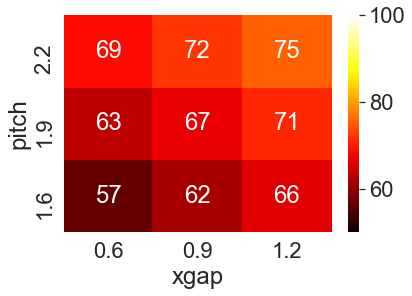

In [151]:
import seaborn as sns 
import matplotlib.pyplot as plt

df2=df.loc[df['tilt']==tilts[1]]
df3 = df2.loc[df2['clearance_height']==clearance_heights[2]]
df3['pitch']=df3['pitch'].round(1)
df3['xgap']=df3['xgap'].round(1)

sns.set(font_scale=2) 
table = df3.pivot('pitch', 'xgap', 'GroundIrrad_percent_GHI')
ax = sns.heatmap(table, cmap='hot', vmin = 50, vmax= 100, annot=True)
ax.invert_yaxis()
print(table)
plt.show()

# TAILS PLOTTING RESULT

NameError: name 'puerto_Rico_YEAR' is not defined

In [37]:
trees = pd.read_csv(r'C:\Users\sayala\Documents\Agrivoltaics\TREES.csv')
trees.tail()

,Unnamed: 0,clearance_height,xgap,tilt,pitch,NorthIrrad,SouthIrrad,EastIrrad,WestIrrad
49,49,3.048,1.2192,18,1.865457,390864.166667,433314.300000,523423.233333,542737.800000
50,50,3.048,1.2192,18,2.170257,424795.800000,430938.066667,556578.100000,583144.433333
51,51,3.048,1.2192,10,1.594408,347665.033333,396275.966667,486525.733333,503014.400000
52,52,3.048,1.2192,10,1.899208,392391.966667,428870.866667,528069.100000,543160.566667
53,53,3.048,1.2192,10,2.204008,418157.566667,441462.466667,569727.566667,592036.966667


In [76]:
trees['TreeIrrad_percent_GHI'] = trees[['NorthIrrad','SouthIrrad','EastIrrad','WestIrrad']].mean(axis=1)*100/puerto_Rico_YEAR


In [77]:
print(trees['TreeIrrad_percent_GHI'].min())
print(trees['TreeIrrad_percent_GHI'].max())


17.77992698955243
28.677808011664922


In [72]:
trees

,Unnamed: 0,clearance_height,xgap,tilt,pitch,NorthIrrad,SouthIrrad,EastIrrad,WestIrrad,TreeIrrad_percent_GHI
0,0,1.8288,0.6096,18,1.560657,283999.500000,379041.566667,404119.166667,493124.766667,19.199386
1,1,1.8288,0.6096,18,1.865457,329050.666667,442646.933333,468764.366667,577784.700000,22.421154
2,2,1.8288,0.6096,18,2.170257,379880.266667,499662.466667,527757.966667,629284.033333,25.309130
3,3,1.8288,0.6096,10,1.594408,274935.300000,429156.566667,404139.666667,524298.366667,21.737833
4,4,1.8288,0.6096,10,1.899208,331071.466667,485804.600000,481749.666667,594569.100000,24.607195
5,5,1.8288,0.6096,10,2.204008,365711.600000,546344.100000,537815.400000,655546.366667,27.673670
6,6,1.8288,0.9144,18,1.560657,316495.533333,442230.200000,434996.266667,541909.666667,22.400045
7,7,1.8288,0.9144,18,1.865457,365385.833333,483838.800000,503091.533333,601285.633333,24.507623
8,8,1.8288,0.9144,18,2.170257,396302.300000,518235.533333,549628.500000,639833.066667,26.249902
9,9,1.8288,0.9144,10,1.594408,310003.500000,480029.533333,438181.400000,569728.333333,24.314674


In [73]:
clearance_heightss = [1.8288, 2.4384, 3.0480]

In [74]:
df2=trees.loc[trees['tilt']==tilts[0]]
df3

,Unnamed: 0,clearance_height,xgap,tilt,pitch,NorthIrrad,SouthIrrad,EastIrrad,WestIrrad,TreeIrrad_percent_GHI
3,3,1.8288,0.6,10,1.6,274935.300000,429156.566667,404139.666667,524298.366667,20.672912
4,4,1.8288,0.6,10,1.9,331071.466667,485804.600000,481749.666667,594569.100000,23.973741
5,5,1.8288,0.6,10,2.2,365711.600000,546344.100000,537815.400000,655546.366667,26.661140
9,9,1.8288,0.9,10,1.6,310003.500000,480029.533333,438181.400000,569728.333333,22.767553
10,10,1.8288,0.9,10,1.9,342868.433333,526349.600000,503563.100000,633084.733333,25.400507
11,11,1.8288,0.9,10,2.2,398292.933333,576605.166667,560722.500000,675877.000000,28.004445
15,15,1.8288,1.2,10,1.6,339118.700000,522670.500000,458012.800000,624346.733333,24.618976
16,16,1.8288,1.2,10,1.9,386609.633333,548460.433333,528304.933333,670552.966667,27.022172
17,17,1.8288,1.2,10,2.2,414940.933333,584476.666667,573009.933333,692245.200000,28.677808


xgap         0.6        0.9        1.2
pitch                                 
1.6    21.737833  24.314674  26.474544
1.9    24.607195  26.660899  27.780867
2.2    27.673670  29.206467  29.605178


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


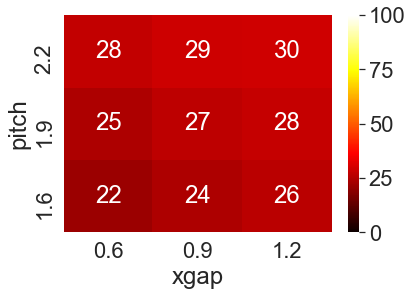

In [75]:
import seaborn as sns 
import matplotlib.pyplot as plt

df2=trees.loc[trees['tilt']==tilts[1]]
df3 = df2.loc[df2['clearance_height']==clearance_heightss[0]]
df3['pitch']=df3['pitch'].round(1)
df3['xgap']=df3['xgap'].round(1)

sns.set(font_scale=2) 
table = df3.pivot('pitch', 'xgap', 'TreeIrrad_percent_GHI')
ax = sns.heatmap(table, cmap='hot', vmin = 0, vmax= 100, annot=True)
ax.invert_yaxis()
print(table)
plt.show()